In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rdm
import os
import kagglehub
from scipy.optimize import minimize
from scipy.optimize import basinhopping
%matplotlib inline
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
url = "https://medata.gov.co/sites/default/files/distribution/1-026-22-000129/sivigila_bpn.csv"

try:
    datos = pd.read_csv(url)
    print("Archivo leído correctamente desde la URL.")
except Exception as e:
    print(f"Error al leer el archivo desde la URL: {e}")

Archivo leído correctamente desde la URL.


## PUNTO 1

Base de datos utilizada: https://www.medata.gov.co/dataset/1-026-22-000129

         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 177
         Gradient evaluations: 55
E= 5.20199817727883e-10


/usr/local/lib/python3.11/dist-packages/scipy/optimize/_minimize.py:724: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_cg(fun, x0, args, jac, callback, **options)


Text(0.5, 0.9, 'E =5.20199817727883e-10')

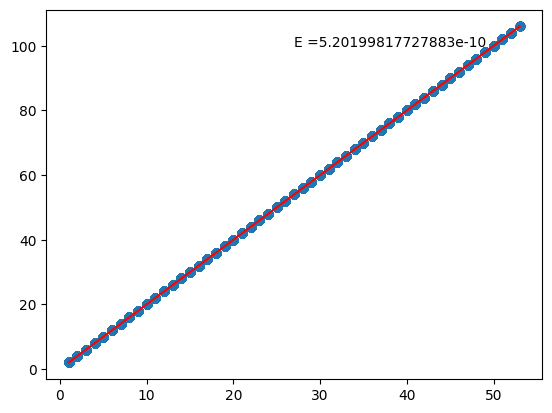

In [ ]:
def f(x):
    if x<1:
      y= np.exp(x)
    else:
      y=2*x
    return y

def sig(x):
    y=1.0/(1.0+np.exp(-x))
    return y

def m(x,*params):
#    y=params[0][0]+params[0][1]*x  #modelo lineal
     w=params[0] #w=(w1,w2,b1,b2)
     #modelo lineal
     y=w[0]*x+w[1]
#    y=w[1]*sig(w[0]*x+w[2])+w[3] #modelo de una neurona https://www.europeanvalley.es/noticias/crear-red-neuronal-desde-las-matematicas/
#    y=w[2]*sig(w[1]*sig(w[0]*x+w[3])+w[4])+w[5] #modelo con dos neuronas en dos capas
    #y=w[2]*sig(w[0]*x+w[4])+w[3]*sig(w[1]*x+w[5])+w[6] #modelo con 1 capa de neuronas en paralelo
     return y

def E(p,*n):
    s=0.0
    for i in range(n[0]):
        s=s+(y[i]-m(x[i],p))**2
    return s


#Aquí se leen los datos
#n=25


columna_datos = 'semana'
p = datos[columna_datos].values
n = len(p)
x=p

#x=np.linspace(0,2,n)
y=np.zeros(n)
for i in range(n):
    y[i]=f(x[i])

nparameters=2
x0=np.ones(nparameters)
rdm.seed(5)
for i in range(nparameters):
  x0[i]=rdm.random()

parameters=minimize(E,x0,args=(n),method='CG',options={'disp':True,'gtol':1e-6,'return_all':True})
#x0=np.array([1,1,1,1,1,1,1])
#parameters=minimize(E,x0,args=(n),method='Powell')

nm=100
xm = np.linspace(x.min(), x.max(), nm)
ym=np.zeros(nm)
for i in range(nm):
    ym[i]=m(xm[i],parameters.x)

Error_global=E(parameters.x,n)
print('E=',Error_global)

plt.figure()
plt.plot(x,y,'o')
plt.plot(xm,ym,'r-')
plt.annotate('E =' +str(Error_global), xy=(0.5, 0.9), xycoords='axes fraction')



In [ ]:
x0

array([0.62290169, 0.74178699])

In [ ]:
parameters

 message: Desired error not necessarily achieved due to precision loss.
 success: False
  status: 2
     fun: 5.20199817727883e-10
       x: [ 2.000e+00  1.865e-08]
     nit: 10
     jac: [ 2.093e-03 -3.805e-03]
    nfev: 177
    njev: 55
 allvecs: [array([ 6.229e-01,  7.418e-01]), array([ 1.632e+00,  7.705e-01]), array([ 1.978e+00,  7.802e-01]), array([ 2.001e+00,  9.740e-02]), array([ 2.000e+00, -5.066e-04]), array([ 2.000e+00, -5.066e-04]), array([ 2.000e+00, -1.383e-04]), array([ 2.000e+00, -1.127e-04]), array([ 2.000e+00, -9.076e-06]), array([ 2.000e+00, -9.076e-06]), array([ 2.000e+00,  1.865e-08])]

## PUNTO 2

         Current function value: 54934614608825624.000000
         Iterations: 4
         Function evaluations: 243
         Gradient evaluations: 78
E= 5.4934614608825624e+16


/usr/local/lib/python3.11/dist-packages/scipy/optimize/_minimize.py:724: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_cg(fun, x0, args, jac, callback, **options)


Text(0.5, 0.9, 'E =5.4934614608825624e+16')

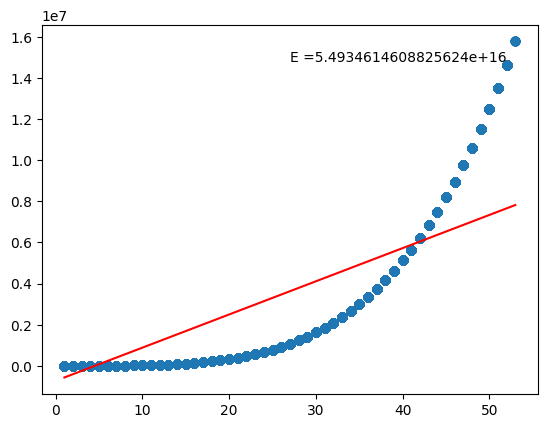

In [ ]:
def f(x):
    y=2*x**4+3*np.exp(1)
    return y

def sig(x):
    y=1.0/(1.0+np.exp(-x))
    return y

def m(x,*params):
#    y=params[0][0]+params[0][1]*x  #modelo lineal
     w=params[0] #w=(w1,w2,b1,b2)
     #modelo lineal
     y=w[0]*x+w[1]
#    y=w[1]*sig(w[0]*x+w[2])+w[3] #modelo de una neurona https://www.europeanvalley.es/noticias/crear-red-neuronal-desde-las-matematicas/
#    y=w[2]*sig(w[1]*sig(w[0]*x+w[3])+w[4])+w[5] #modelo con dos neuronas en dos capas
    #y=w[2]*sig(w[0]*x+w[4])+w[3]*sig(w[1]*x+w[5])+w[6] #modelo con 1 capa de neuronas en paralelo
     return y

def E(p,*n):
    s=0.0
    for i in range(n[0]):
        s=s+(y[i]-m(x[i],p))**2
    return s


#Aquí se leen los datos
#n=25



columna_datos = 'semana'
p = datos[columna_datos].values
n = len(p)
x=p

#x=np.linspace(0,2,n)
y=np.zeros(n)
for i in range(n):
    y[i]=f(x[i])

nparameters=2
x0=np.ones(nparameters)
rdm.seed(5)
for i in range(nparameters):
  x0[i]=rdm.random()

parameters=minimize(E,x0,args=(n),method='CG',options={'disp':True,'gtol':1e-6,'return_all':True})
#x0=np.array([1,1,1,1,1,1,1])
#parameters=minimize(E,x0,args=(n),method='Powell')

nm=100
xm = np.linspace(x.min(), x.max(), nm)
ym=np.zeros(nm)
for i in range(nm):
    ym[i]=m(xm[i],parameters.x)

Error_global=E(parameters.x,n)
print('E=',Error_global)

plt.figure()
plt.plot(x,y,'o')
plt.plot(xm,ym,'r-')
plt.annotate('E =' +str(Error_global), xy=(0.5, 0.9), xycoords='axes fraction')

In [ ]:
x0

array([0.62290169, 0.74178699])

In [ ]:
parameters

 message: Desired error not necessarily achieved due to precision loss.
 success: False
  status: 2
     fun: 5.4934614608825624e+16
       x: [ 1.614e+05 -7.359e+05]
     nit: 4
     jac: [ 2.040e+10  1.611e+09]
    nfev: 243
    njev: 78
 allvecs: [array([ 6.229e-01,  7.418e-01]), array([ 1.035e+03,  2.106e+00]), array([ 1.364e+05,  1.107e+02]), array([ 1.559e+05, -7.226e+05]), array([ 1.614e+05, -7.359e+05])]

## PUNTO 3

In [ ]:
# 1. Cargar los datos desde KaggleHub
# Ruta proporcionada por KaggleHub
path = kagglehub.dataset_download("harlfoxem/housesalesprediction")
print("Path to dataset files:", path)

# Construir la ruta al archivo CSV
file_path = os.path.join(path, "kc_house_data.csv")

Path to dataset files: /root/.cache/kagglehub/datasets/harlfoxem/housesalesprediction/versions/1


In [ ]:
#1-) Predecir el precio de una vivienda en función de sus características.


king_county_data = pd.read_csv(file_path)

print(king_county_data.head())

print(king_county_data.dtypes)

numeric_columns = king_county_data.select_dtypes(include=['int64', 'float64']).columns

king_county_data[numeric_columns] = king_county_data[numeric_columns].fillna(king_county_data[numeric_columns].mean())

print(king_county_data.isnull().sum())


X = king_county_data[['sqft_living']]  # Característica (variable independiente)
y = king_county_data['price']  # Variable objetivo (precio)


           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

MSE (Error Cuadrático Medio): 76484977061.77612
R² (Coeficiente de Determinación): 0.49406905389089006


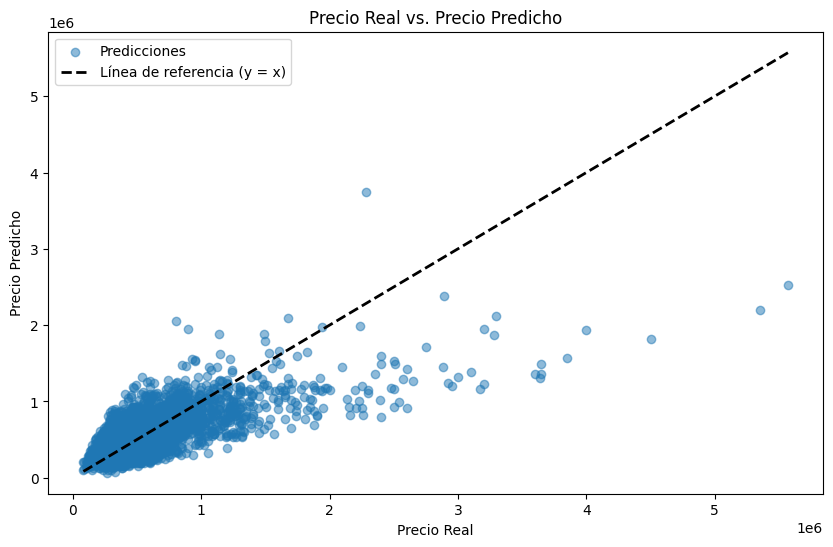

In [ ]:
#Entrenar el modelo de regresión lineal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predecir y evaluar el modelo
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
print("MSE (Error Cuadrático Medio):", mean_squared_error(y_test, y_pred))
print("R² (Coeficiente de Determinación):", r2_score(y_test, y_pred))

# Gráfica de Precio Real vs. Precio Predicho
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicciones')  # Graficar puntos
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Línea de referencia (y = x)')  # Línea de referencia
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Precio Real vs. Precio Predicho')
plt.legend()
plt.show()

Precisión del modelo: 0.61
Reporte de clasificación:
              precision    recall  f1-score   support

   Económica       0.54      0.26      0.35       888
        Lujo       0.74      0.56      0.64      1319
       Media       0.58      0.79      0.67      2116

    accuracy                           0.61      4323
   macro avg       0.62      0.54      0.55      4323
weighted avg       0.62      0.61      0.59      4323



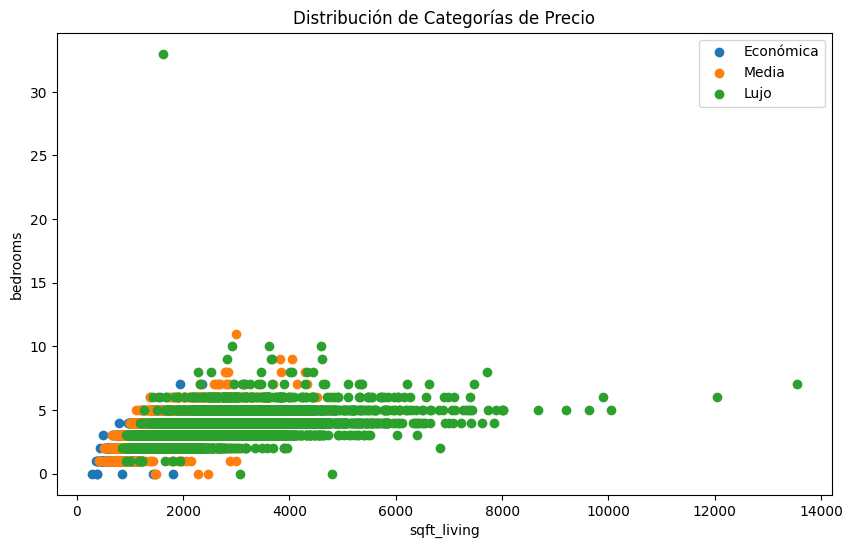

In [ ]:
#2-- Clasificar las propiedades en "Económicas", "Medias" y "Lujo" según el precio

# Definir categorías de precios
def categorize_price(price):
    if price < 300000:
        return 'Económica'
    elif 300000 <= price < 600000:
        return 'Media'
    else:
        return 'Lujo'

# Aplicar la categorización
king_county_data['PriceCategory'] = king_county_data['price'].apply(categorize_price)

# Usamos 'sqft_living' y 'bedrooms' como características principales
X = king_county_data[['sqft_living', 'bedrooms']]  # Características (variables independientes)
y = king_county_data['PriceCategory']  # Variable objetivo (categoría de precio)

# Entrenar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000)


model.fit(X_train, y_train)

# Predecir las etiquetas en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Mostrar el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

#  Crear un gráfico de dispersión para visualizar las clasificaciones
plt.figure(figsize=(10, 6))
for category in king_county_data['PriceCategory'].unique():
    category_data = king_county_data[king_county_data['PriceCategory'] == category]
    plt.scatter(category_data['sqft_living'], category_data['bedrooms'], label=category)

# Agregar etiquetas y leyenda
plt.xlabel('sqft_living')
plt.ylabel('bedrooms')
plt.title('Distribución de Categorías de Precio')
plt.legend()

# Mostrar el gráfico
plt.show()

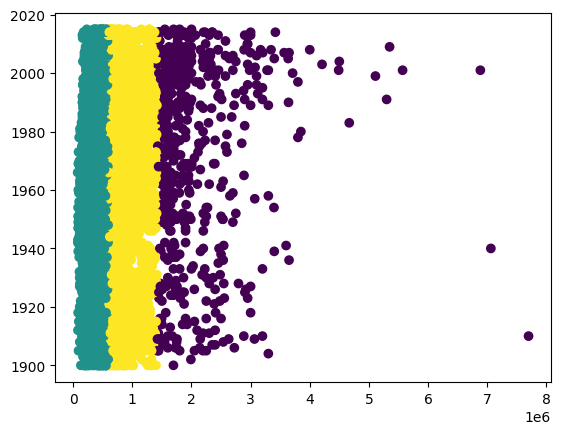

In [ ]:
#3-- Identificar segmentos de mercado mediante K-Means.
kmeans = cluster.KMeans(3)
kmeans.fit(king_county_data[['price']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(king_county_data['price'], king_county_data['yr_built'], c=labels)
plt.show()